# Ejercicio 1

### Carga la base de datos Iris y grafica las observaciones incluídas en este conjunto de datos utilizando pares de variables predictoras. Representa la clase de cada observación con un color distinto. ¿Qué representan las variables incluidas en la base de datos? ¿Consideras que las variables predictoras tienen información suficiente para determinar la clase de cada uno de los tipos de datos?

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)

print(iris_dataframe.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
iris_dataframe['target'] = iris.target
iris_dataframe['species'] = iris_dataframe['target'].apply(lambda x: iris.target_names[x])

iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


| Variable              | Nombre (inglés)         | Significado                                                                 |
|-----------------------|-------------------------|------------------------------------------------------------------------------|
| sepal length (cm)     | Sepal length (cm)       | Longitud del sépalo                                                         |
| sepal width (cm)      | Sepal width (cm)        | Ancho del sépalo                                                            |
| petal length (cm)     | Petal length (cm)       | Longitud del pétalo                                                         |
| petal width (cm)      | Petal width (cm)        | Ancho del pétalo                                                            |


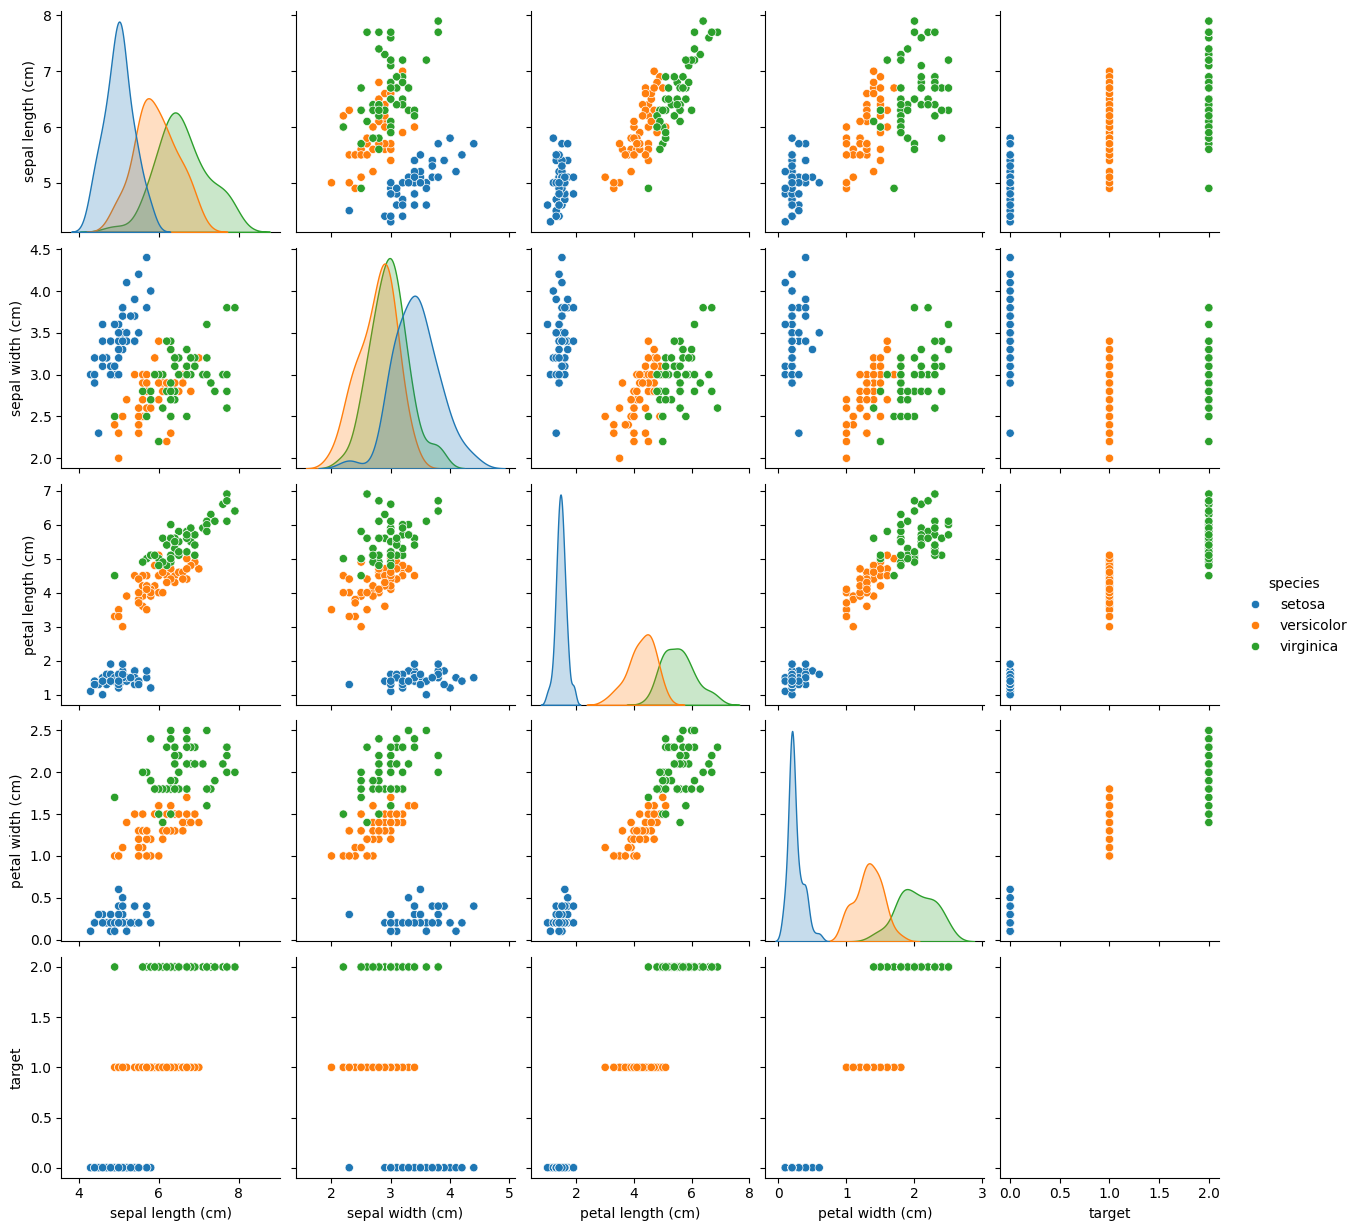

In [5]:
import seaborn as sns

sns.pairplot(iris_dataframe, hue="species")

### Entrena un clasificador SVM lineal con todos los datos. No olvides indicar en los parámetros del clasificador kernel ='lineal'. Inventa 10 nuevas observaciones, y verifica el resultado obtenido al evaluar el clasificador con estos nuevos datos. 

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = iris_dataframe.drop(columns=['target', 'species'])
y = iris_dataframe['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
import numpy as np

datos_inventados = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [6.2, 2.8, 4.8, 1.8],
    [7.0, 3.2, 4.7, 1.4],
    [6.3, 3.3, 6.0, 2.5],
    [4.9, 3.1, 1.5, 0.1],
    [5.5, 2.5, 4.0, 1.3],
    [6.7, 3.0, 5.2, 2.3],
    [5.8, 2.7, 5.1, 1.9],
    [5.0, 3.6, 1.4, 0.2],
    [6.1, 2.9, 4.7, 0.8]])

In [15]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [16]:
from sklearn.metrics import accuracy_score

print("Accuracy en test:", accuracy_score(y_test, y_pred))

Accuracy en test: 1.0


In [17]:
clf.predict(datos_inventados)

/Users/pablovargas/Documents/MachineLearningProblems/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0, 2, 1, 2, 0, 1, 2, 2, 0, 1])

In [18]:
predicciones = np.array([0, 2, 1, 2, 0, 1, 2, 2, 0, 1])

nombres = iris.target_names[predicciones]
print(nombres)

['setosa' 'virginica' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'virginica' 'virginica' 'setosa' 'versicolor']


### Evalúa el modelo de clasificación con k-fold cross validation (k = 10). Calcula la exactitud del clasificador (accuaracy), así como la precisión y el recall para cada clase. Puedes utilizar para este punto la matriz de confusiónLinks to an external site. calculada con sklearn.


Accuracy general (promedio): 0.98

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      0.94      0.97        50
   virginica       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



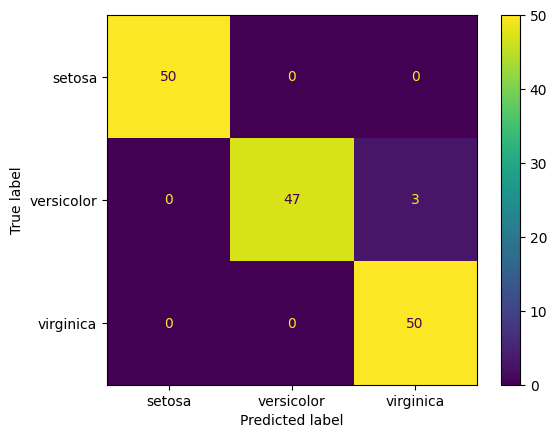

In [21]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Validación cruzada con k=10
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Obtener predicciones con validación cruzada
y_pred = cross_val_predict(clf, X, y, cv=kfold)

# Calcular métricas
accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy general (promedio): {accuracy:.2f}\n")

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y, y_pred, target_names=iris.target_names))

# Matriz de confusión
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()